In [1]:
!pip install stopwords

In [2]:
import pandas as pd
import nltk

df=pd.read_excel('감성분석반영리뷰-빅데이터.xlsx')
df

,관광지,전체내용,리뷰내용_1,리뷰내용_0,긍정확률_0,부정확률_0,긍정확률_1,부정확률_1
0,경복궁,"['대한민국의 역사 ', ' 대한민국의 역사가 잠들어 있는 곳. 서울을 방문했다면 ...",대한민국의 역사가 잠들어 있는 곳 서울을 방문했다면 꼭 방문해야 되는 곳 경복궁은...,대한민국의 역사,0.381490,0.618510,0.951248,0.048752
1,경복궁,"['국민이 공감하는 장소 ', ' 경복궁은 국민들이 자주 찾는곳으로 작성자는 주말에...",경복궁은 국민들이 자주 찾는곳으로 작성자는 주말에 자주 가족들과 방문하고 있음특히...,국민이 공감하는 장소,0.850068,0.149932,0.974223,0.025777
2,경복궁,"['산책하기 좋은 경복궁 ', ' 날씨 좋은 날 종종 산책하러 경복궁에 가는데 마음...",날씨 좋은 날 종종 산책하러 경복궁에 가는데 마음이 편온해지는 기분이라고 할까요 ...,산책하기 좋은 경복궁,0.916744,0.083256,0.976418,0.023582
3,경복궁,"['Good ', ' Goooooood 다 좋습니다 다음에 또 오고 싶네요 근처 관...",다 좋습니다 다음에 또 오고 싶네요 근처 관광지도많고 먹을거리도많네요 서울올때마...,,0.137770,0.862230,0.984774,0.015226
4,경복궁,"['가족단위로 방문하기 좋은곳 ', ' 요새 더더욱 코로나로 인해 사람 방문이 적음...",요새 더더욱 코로나로 인해 사람 방문이 적음 두자녀 동반시 성인 입장무료 지금 시...,가족단위로 방문하기 좋은곳,0.931031,0.068969,0.690581,0.309419
...,...,...,...,...,...,...,...,...
5351,순천 드라마세트장,['서울 달동네와 어린 시절에 보고 경험해 익숙한 셋트장에 잊혀진 기억들이 새록 새...,리뷰없음,서울 달동네와 어린 시절에 보고 경험해 익숙한 셋트장에 잊혀진 기억들이 새록 새록특...,0.311129,0.688871,0.005893,0.994107
5352,순천 드라마세트장,['사진찍기 좋은 날에~~^^'],리뷰없음,사진찍기 좋은 날에,0.848867,0.151133,0.005893,0.994107
5353,순천 드라마세트장,['기분 좋은 그 어떤 날~~~ 그 곳에선 그 어떠한 모습도 예쁘...,리뷰없음,기분 좋은 그 어떤 날 그 곳에선 그 어떠한 모습도 예쁘고 사랑...,0.962142,0.037858,0.005893,0.994107
5354,순천 드라마세트장,['재밌네요ㅎ'],리뷰없음,재밌네요ㅎ,0.934410,0.065590,0.005893,0.994107


In [3]:
df.isnull().sum()

관광지       0
전체내용      0
리뷰내용_1    1
리뷰내용_0    2
긍정확률_0    0
부정확률_0    0
긍정확률_1    0
부정확률_1    0
dtype: int64

In [4]:
from konlpy.tag import Okt

In [5]:
df = df.dropna(how = 'any')
df['리뷰내용_1'] = df['리뷰내용_1'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

okt = Okt()
tokenized_data = []

for sentence in df['리뷰내용_1']:
    temp_X = okt.nouns(sentence)
    temp_X = [word for word in temp_X if len(word)>1]
    tokenized_data.append(temp_X)

pd.DataFrame(tokenized_data).to_csv('./data/리뷰내용_1_토큰.csv')

<ipython-input-5-19891803506e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['리뷰내용_1'] = df['리뷰내용_1'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-5-19891803506e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['리뷰내용_1'] = df['리뷰내용_1'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [6]:
pd.DataFrame(tokenized_data)

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
0,대한민국,역사,서울,방문,방문,경복궁,우리,역사,경복궁,산책,...,None,None,None,None,None,None,None,None,None,None
1,경복궁,국민,자주,작성자,주말,자주,가족,방문,가족,방문,...,None,None,None,None,None,None,None,None,None,None
2,날씨,종종,산책,경복궁,마음,해지,기분,가을,산책,추천,...,None,None,None,None,None,None,None,None,None,None
3,다음,근처,관광지,거리,자주,이용,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,요새,더욱,코로나,사람,방문,자녀,반시,성인,입장,무료,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5348,리뷰,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5349,리뷰,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5350,리뷰,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5351,리뷰,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
!pip install pyLDAvis

100%|██████████████████████████████████████████████████████████████████████████| 5354/5354 [00:00<00:00, 142123.11it/s]
2022-05-29 21:40:48,891 : INFO : using symmetric alpha at 0.5
2022-05-29 21:40:48,892 : INFO : using symmetric eta at 0.5
2022-05-29 21:40:48,895 : INFO : using serial LDA version on this node
2022-05-29 21:40:48,903 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 5354 documents, updating model once every 2000 documents, evaluating perplexity every 5354 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-29 21:40:48,905 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-05-29 21:40:48,907 : INFO : PROGRESS: pass 0, at document #2000/5354


Number of unique tokens: 13428
Number of documents: 5354


2022-05-29 21:40:50,686 : INFO : merging changes from 2000 documents into a model of 5354 documents
2022-05-29 21:40:50,699 : INFO : topic #0 (0.500): 0.894*"" + 0.001*"방문" + 0.001*"아이" + 0.001*"산책" + 0.001*"사람" + 0.001*"박물관" + 0.001*"공원" + 0.001*"시간" + 0.001*"정말" + 0.000*"가족"
2022-05-29 21:40:50,702 : INFO : topic #1 (0.500): 0.876*"" + 0.001*"아이" + 0.001*"생각" + 0.001*"방문" + 0.001*"시간" + 0.001*"산책" + 0.001*"사람" + 0.001*"추천" + 0.001*"박물관" + 0.001*"역사"
2022-05-29 21:40:50,703 : INFO : topic diff=3.470535, rho=1.000000
2022-05-29 21:40:50,705 : INFO : PROGRESS: pass 0, at document #4000/5354
2022-05-29 21:40:52,402 : INFO : merging changes from 2000 documents into a model of 5354 documents
2022-05-29 21:40:52,408 : INFO : topic #0 (0.500): 0.911*"" + 0.001*"방문" + 0.001*"박물관" + 0.001*"산책" + 0.001*"아이" + 0.001*"사람" + 0.000*"공원" + 0.000*"바다" + 0.000*"정말" + 0.000*"시간"
2022-05-29 21:40:52,410 : INFO : topic #1 (0.500): 0.866*"" + 0.001*"생각" + 0.001*"아이" + 0.001*"방문" + 0.001*"시간" + 0.001*"박물관"

2022-05-29 21:41:09,879 : INFO : 55 batches submitted to accumulate stats from 3520 documents (133760 virtual)
2022-05-29 21:41:09,910 : INFO : 56 batches submitted to accumulate stats from 3584 documents (136192 virtual)
2022-05-29 21:41:09,923 : INFO : 57 batches submitted to accumulate stats from 3648 documents (138624 virtual)
2022-05-29 21:41:09,964 : INFO : 58 batches submitted to accumulate stats from 3712 documents (141056 virtual)
2022-05-29 21:41:09,978 : INFO : 59 batches submitted to accumulate stats from 3776 documents (143488 virtual)
2022-05-29 21:41:09,984 : INFO : 60 batches submitted to accumulate stats from 3840 documents (145920 virtual)
2022-05-29 21:41:10,006 : INFO : 61 batches submitted to accumulate stats from 3904 documents (148352 virtual)
2022-05-29 21:41:10,044 : INFO : 62 batches submitted to accumulate stats from 3968 documents (150784 virtual)
2022-05-29 21:41:10,053 : INFO : 63 batches submitted to accumulate stats from 4032 documents (153216 virtual)
2

2022-05-29 21:41:29,980 : INFO : 2 batches submitted to accumulate stats from 128 documents (4864 virtual)
2022-05-29 21:41:30,001 : INFO : 3 batches submitted to accumulate stats from 192 documents (7296 virtual)
2022-05-29 21:41:30,013 : INFO : 4 batches submitted to accumulate stats from 256 documents (9728 virtual)
2022-05-29 21:41:30,038 : INFO : 5 batches submitted to accumulate stats from 320 documents (12160 virtual)
2022-05-29 21:41:30,064 : INFO : 6 batches submitted to accumulate stats from 384 documents (14592 virtual)
2022-05-29 21:41:30,073 : INFO : 7 batches submitted to accumulate stats from 448 documents (17024 virtual)
2022-05-29 21:41:30,086 : INFO : 8 batches submitted to accumulate stats from 512 documents (19456 virtual)
2022-05-29 21:41:30,099 : INFO : 9 batches submitted to accumulate stats from 576 documents (21888 virtual)
2022-05-29 21:41:30,113 : INFO : 10 batches submitted to accumulate stats from 640 documents (24320 virtual)
2022-05-29 21:41:30,121 : INFO

2022-05-29 21:41:31,103 : INFO : 77 batches submitted to accumulate stats from 4928 documents (187264 virtual)
2022-05-29 21:41:31,135 : INFO : 78 batches submitted to accumulate stats from 4992 documents (189696 virtual)
2022-05-29 21:41:31,157 : INFO : 79 batches submitted to accumulate stats from 5056 documents (192128 virtual)
2022-05-29 21:41:31,169 : INFO : 80 batches submitted to accumulate stats from 5120 documents (194560 virtual)
2022-05-29 21:41:31,178 : INFO : 81 batches submitted to accumulate stats from 5184 documents (196992 virtual)
2022-05-29 21:41:31,186 : INFO : 82 batches submitted to accumulate stats from 5248 documents (199424 virtual)
2022-05-29 21:41:31,203 : INFO : 83 batches submitted to accumulate stats from 5312 documents (201856 virtual)
2022-05-29 21:41:31,211 : INFO : 84 batches submitted to accumulate stats from 5376 documents (203452 virtual)
2022-05-29 21:41:31,837 : INFO : 7 accumulators retrieved from output queue
2022-05-29 21:41:31,935 : INFO : acc

2022-05-29 21:41:53,189 : INFO : 24 batches submitted to accumulate stats from 1536 documents (58368 virtual)
2022-05-29 21:41:53,197 : INFO : 25 batches submitted to accumulate stats from 1600 documents (60800 virtual)
2022-05-29 21:41:53,214 : INFO : 26 batches submitted to accumulate stats from 1664 documents (63232 virtual)
2022-05-29 21:41:53,227 : INFO : 27 batches submitted to accumulate stats from 1728 documents (65664 virtual)
2022-05-29 21:41:53,235 : INFO : 28 batches submitted to accumulate stats from 1792 documents (68096 virtual)
2022-05-29 21:41:53,285 : INFO : 29 batches submitted to accumulate stats from 1856 documents (70528 virtual)
2022-05-29 21:41:53,289 : INFO : 30 batches submitted to accumulate stats from 1920 documents (72960 virtual)
2022-05-29 21:41:53,303 : INFO : 31 batches submitted to accumulate stats from 1984 documents (75392 virtual)
2022-05-29 21:41:53,318 : INFO : 32 batches submitted to accumulate stats from 2048 documents (77824 virtual)
2022-05-29

2022-05-29 21:41:57,340 : INFO : topic #1 (0.050): 0.160*"" + 0.006*"공원" + 0.004*"우리" + 0.003*"계곡" + 0.002*"해변" + 0.002*"위해" + 0.002*"버스" + 0.002*"시간" + 0.002*"백담사" + 0.002*"맑은"
2022-05-29 21:41:57,342 : INFO : topic #10 (0.050): 0.235*"" + 0.008*"우리" + 0.006*"그것" + 0.006*"공원" + 0.005*"계곡" + 0.004*"위해" + 0.004*"얼음" + 0.004*"방문" + 0.003*"시간" + 0.003*"한국"
2022-05-29 21:41:57,345 : INFO : topic diff=16.582331, rho=1.000000
2022-05-29 21:41:57,347 : INFO : PROGRESS: pass 0, at document #4000/5354
2022-05-29 21:41:58,079 : INFO : merging changes from 2000 documents into a model of 5354 documents
2022-05-29 21:41:58,119 : INFO : topic #16 (0.050): 0.002*"자신" + 0.001*"사람" + 0.001*"" + 0.001*"헌인릉" + 0.001*"임금" + 0.001*"시대" + 0.001*"개국" + 0.001*"왕릉" + 0.001*"신들" + 0.001*"이후"
2022-05-29 21:41:58,123 : INFO : topic #15 (0.050): 0.271*"" + 0.011*"공원" + 0.011*"시간" + 0.010*"제호" + 0.007*"보물" + 0.006*"성당" + 0.006*"정도" + 0.005*"건립" + 0.005*"천주교" + 0.004*"사찰"
2022-05-29 21:41:58,126 : INFO : topic #5 (0

2022-05-29 21:42:13,805 : INFO : 46 batches submitted to accumulate stats from 2944 documents (111872 virtual)
2022-05-29 21:42:13,846 : INFO : 47 batches submitted to accumulate stats from 3008 documents (114304 virtual)
2022-05-29 21:42:13,857 : INFO : 48 batches submitted to accumulate stats from 3072 documents (116736 virtual)
2022-05-29 21:42:13,869 : INFO : 49 batches submitted to accumulate stats from 3136 documents (119168 virtual)
2022-05-29 21:42:13,881 : INFO : 50 batches submitted to accumulate stats from 3200 documents (121600 virtual)
2022-05-29 21:42:13,893 : INFO : 51 batches submitted to accumulate stats from 3264 documents (124032 virtual)
2022-05-29 21:42:13,905 : INFO : 52 batches submitted to accumulate stats from 3328 documents (126464 virtual)
2022-05-29 21:42:13,928 : INFO : 53 batches submitted to accumulate stats from 3392 documents (128896 virtual)
2022-05-29 21:42:13,957 : INFO : 54 batches submitted to accumulate stats from 3456 documents (131328 virtual)
2

2022-05-29 21:42:22,097 : INFO : topic #23 (0.038): 0.007*"" + 0.001*"백담사" + 0.001*"대리" + 0.001*"바위" + 0.001*"경치" + 0.000*"통행" + 0.000*"내외" + 0.000*"연한" + 0.000*"가을" + 0.000*"사이"
2022-05-29 21:42:22,099 : INFO : topic #8 (0.038): 0.001*"창경궁" + 0.001*"궁궐" + 0.000*"다른" + 0.000*"왕실" + 0.000*"" + 0.000*"생활" + 0.000*"복원" + 0.000*"공간" + 0.000*"가족" + 0.000*"동물원"
2022-05-29 21:42:22,103 : INFO : topic diff=0.220976, rho=0.577350
2022-05-29 21:42:22,106 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel<num_terms=13428, num_topics=26, decay=0.5, chunksize=2000> in 5.81s', 'datetime': '2022-05-29T21:42:22.106346', 'gensim': '4.2.0', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}
2022-05-29 21:42:22,119 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
2022-05-29 21:42:37,156 : INFO : 1 batches submitted to accumulate stat

2022-05-29 21:42:38,239 : INFO : 68 batches submitted to accumulate stats from 4352 documents (165376 virtual)
2022-05-29 21:42:38,255 : INFO : 69 batches submitted to accumulate stats from 4416 documents (167808 virtual)
2022-05-29 21:42:38,264 : INFO : 70 batches submitted to accumulate stats from 4480 documents (170240 virtual)
2022-05-29 21:42:38,282 : INFO : 71 batches submitted to accumulate stats from 4544 documents (172672 virtual)
2022-05-29 21:42:38,292 : INFO : 72 batches submitted to accumulate stats from 4608 documents (175104 virtual)
2022-05-29 21:42:38,313 : INFO : 73 batches submitted to accumulate stats from 4672 documents (177536 virtual)
2022-05-29 21:42:38,328 : INFO : 74 batches submitted to accumulate stats from 4736 documents (179968 virtual)
2022-05-29 21:42:38,347 : INFO : 75 batches submitted to accumulate stats from 4800 documents (182400 virtual)
2022-05-29 21:42:38,356 : INFO : 76 batches submitted to accumulate stats from 4864 documents (184832 virtual)
2

2022-05-29 21:43:02,971 : INFO : 14 batches submitted to accumulate stats from 896 documents (34048 virtual)
2022-05-29 21:43:02,985 : INFO : 15 batches submitted to accumulate stats from 960 documents (36480 virtual)
2022-05-29 21:43:02,994 : INFO : 16 batches submitted to accumulate stats from 1024 documents (38912 virtual)
2022-05-29 21:43:03,014 : INFO : 17 batches submitted to accumulate stats from 1088 documents (41344 virtual)
2022-05-29 21:43:03,023 : INFO : 18 batches submitted to accumulate stats from 1152 documents (43776 virtual)
2022-05-29 21:43:03,039 : INFO : 19 batches submitted to accumulate stats from 1216 documents (46208 virtual)
2022-05-29 21:43:03,053 : INFO : 20 batches submitted to accumulate stats from 1280 documents (48640 virtual)
2022-05-29 21:43:03,072 : INFO : 21 batches submitted to accumulate stats from 1344 documents (51072 virtual)
2022-05-29 21:43:03,084 : INFO : 22 batches submitted to accumulate stats from 1408 documents (53504 virtual)
2022-05-29 2

2022-05-29 21:43:06,581 : INFO : running online (single-pass) LDA training, 38 topics, 1 passes over the supplied corpus of 5354 documents, updating model once every 2000 documents, evaluating perplexity every 5354 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-29 21:43:06,583 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-05-29 21:43:06,585 : INFO : PROGRESS: pass 0, at document #2000/5354
2022-05-29 21:43:08,159 : INFO : merging changes from 2000 documents into a model of 5354 documents
2022-05-29 21:43:08,237 : INFO : topic #24 (0.026): 0.000*"2582" + 0.000*"2580" + 0.000*"가슴속" + 0.000*"2583" + 0.000*"진남관" + 0.000*"2584" + 0.000*"2581" + 0.000*"2579" + 0.000*"만엔" + 0.000*"가건물"
2022-05-29 21:43:08,244 : INFO : topic #4 (0.026): 0.000*"2582" + 0.000*"2580" + 0.000*"가슴속" + 0.000*"2583" + 0.000*"진남관" + 0.000*"2584" + 0.000*"2581" + 0.000*"2579" + 0.000*"만엔" + 0.000*"가건물"

2022-05-29 21:43:25,007 : INFO : 34 batches submitted to accumulate stats from 2176 documents (82688 virtual)
2022-05-29 21:43:25,027 : INFO : 35 batches submitted to accumulate stats from 2240 documents (85120 virtual)
2022-05-29 21:43:25,066 : INFO : 36 batches submitted to accumulate stats from 2304 documents (87552 virtual)
2022-05-29 21:43:25,076 : INFO : 37 batches submitted to accumulate stats from 2368 documents (89984 virtual)
2022-05-29 21:43:25,084 : INFO : 38 batches submitted to accumulate stats from 2432 documents (92416 virtual)
2022-05-29 21:43:25,099 : INFO : 39 batches submitted to accumulate stats from 2496 documents (94848 virtual)
2022-05-29 21:43:25,107 : INFO : 40 batches submitted to accumulate stats from 2560 documents (97280 virtual)
2022-05-29 21:43:25,121 : INFO : 41 batches submitted to accumulate stats from 2624 documents (99712 virtual)
2022-05-29 21:43:25,148 : INFO : 42 batches submitted to accumulate stats from 2688 documents (102144 virtual)
2022-05-2

2022-05-29 21:43:32,675 : INFO : topic #38 (0.023): 0.000*"68" + 0.000*"132" + 0.000*"49" + 0.000*"5" + 0.000*"99" + 0.000*"4" + 0.000*"109" + 0.000*"142" + 0.000*"120" + 0.000*"138"
2022-05-29 21:43:32,677 : INFO : topic #28 (0.023): 0.000*"2582" + 0.000*"2580" + 0.000*"가슴속" + 0.000*"2583" + 0.000*"진남관" + 0.000*"2584" + 0.000*"2581" + 0.000*"2579" + 0.000*"만엔" + 0.000*"가건물"
2022-05-29 21:43:32,679 : INFO : topic #3 (0.023): 0.065*"" + 0.014*"바위" + 0.011*"단풍" + 0.009*"새싹" + 0.008*"색깔" + 0.008*"봉우리" + 0.008*"절대" + 0.008*"백담사" + 0.008*"계곡" + 0.008*"가을"
2022-05-29 21:43:32,683 : INFO : topic diff=0.254893, rho=0.707107
2022-05-29 21:43:34,174 : INFO : -0.759 per-word bound, 1.7 perplexity estimate based on a held-out corpus of 1354 documents with 199038 words
2022-05-29 21:43:34,185 : INFO : PROGRESS: pass 0, at document #5354/5354
2022-05-29 21:43:35,747 : INFO : merging changes from 1354 documents into a model of 5354 documents
2022-05-29 21:43:35,838 : INFO : topic #2 (0.023): 0.022*"꽃

2022-05-29 21:43:51,190 : INFO : 54 batches submitted to accumulate stats from 3456 documents (131328 virtual)
2022-05-29 21:43:51,205 : INFO : 55 batches submitted to accumulate stats from 3520 documents (133760 virtual)
2022-05-29 21:43:51,217 : INFO : 56 batches submitted to accumulate stats from 3584 documents (136192 virtual)
2022-05-29 21:43:51,231 : INFO : 57 batches submitted to accumulate stats from 3648 documents (138624 virtual)
2022-05-29 21:43:51,272 : INFO : 58 batches submitted to accumulate stats from 3712 documents (141056 virtual)
2022-05-29 21:43:51,281 : INFO : 59 batches submitted to accumulate stats from 3776 documents (143488 virtual)
2022-05-29 21:43:51,294 : INFO : 60 batches submitted to accumulate stats from 3840 documents (145920 virtual)
2022-05-29 21:43:51,309 : INFO : 61 batches submitted to accumulate stats from 3904 documents (148352 virtual)
2022-05-29 21:43:51,320 : INFO : 62 batches submitted to accumulate stats from 3968 documents (150784 virtual)
2

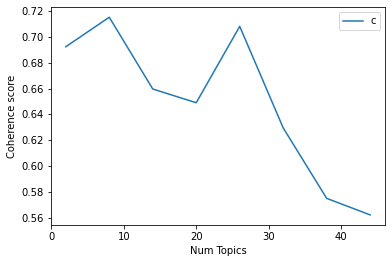

In [8]:
from tqdm import tqdm
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt 

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = [] 
    model_list = [] 
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model) 
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence()) 
    return model_list, coherence_values 

def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 50;
    start = 2;
    step = 6; 
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, 
                                                            texts=processed_data, start=start, limit=limit, step=step) 
    x = range(start, limit, step) 
    plt.plot(x, coherence_values) 
    plt.xlabel("Num Topics") 
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best') 
    plt.show() 


processed_data = [sent.strip().split(",") for sent in tqdm(open('./data/리뷰내용_1_토큰.csv', 'r', encoding='utf-8').readlines())]
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]
print('Number of unique tokens: %d' % len(dictionary)) 
print('Number of documents: %d' % len(corpus))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 

find_optimal_number_of_topics(dictionary, corpus, processed_data)

C:\Users\SOOBIN\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████████████████████████████████████████████████████████████████████| 5354/5354 [00:00<00:00, 143911.00it/s]
2022-05-29 21:43:53,859 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2022-05-29 21:43:54,254 : INFO : built Dictionary<13428 unique tokens: ['', '0', '1', '10', '100']...> from 5354 documents (total 787038 corpus positions)
2022-05-29 21:43:54,271 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<13428 unique tokens: ['', '0', '1', '10', '100']...> from 5354 documents (total 787038 corpus positions)", 'datetime': '2022-05-29T21:43:54.271037', 'gensim': '4.2.0', 'python': '3.8.8 (default

Number of unique tokens: 1785
Number of documents: 5354


2022-05-29 21:43:56,106 : INFO : merging changes from 2000 documents into a model of 5354 documents
2022-05-29 21:43:56,121 : INFO : topic #0 (0.500): 0.014*"공원" + 0.010*"서울" + 0.009*"정말" + 0.009*"사진" + 0.008*"장소" + 0.008*"코스" + 0.007*"역사" + 0.006*"주변" + 0.006*"계곡" + 0.006*"바다"
2022-05-29 21:43:56,122 : INFO : topic #1 (0.500): 0.009*"정도" + 0.008*"역사" + 0.007*"정말" + 0.006*"위치" + 0.006*"한번" + 0.006*"풍경" + 0.006*"근처" + 0.005*"입장료" + 0.005*"가을" + 0.005*"전시"
2022-05-29 21:43:56,123 : INFO : topic diff=1.186833, rho=1.000000
2022-05-29 21:43:56,125 : INFO : PROGRESS: pass 0, at document #4000/5354
2022-05-29 21:43:57,201 : INFO : merging changes from 2000 documents into a model of 5354 documents
2022-05-29 21:43:57,213 : INFO : topic #0 (0.500): 0.012*"공원" + 0.009*"장소" + 0.008*"사찰" + 0.008*"바다" + 0.008*"코스" + 0.008*"사진" + 0.008*"정말" + 0.007*"느낌" + 0.007*"주변" + 0.006*"체험"
2022-05-29 21:43:57,216 : INFO : topic #1 (0.500): 0.008*"정도" + 0.007*"역사" + 0.006*"마을" + 0.006*"입장료" + 0.006*"가을" + 0.00

2022-05-29 21:44:01,250 : INFO : 55 batches submitted to accumulate stats from 3520 documents (133760 virtual)
2022-05-29 21:44:01,275 : INFO : 56 batches submitted to accumulate stats from 3584 documents (136192 virtual)
2022-05-29 21:44:01,292 : INFO : 57 batches submitted to accumulate stats from 3648 documents (138624 virtual)
2022-05-29 21:44:01,312 : INFO : 58 batches submitted to accumulate stats from 3712 documents (141056 virtual)
2022-05-29 21:44:01,329 : INFO : 59 batches submitted to accumulate stats from 3776 documents (143488 virtual)
2022-05-29 21:44:01,336 : INFO : 60 batches submitted to accumulate stats from 3840 documents (145920 virtual)
2022-05-29 21:44:01,346 : INFO : 61 batches submitted to accumulate stats from 3904 documents (148352 virtual)
2022-05-29 21:44:01,353 : INFO : 62 batches submitted to accumulate stats from 3968 documents (150784 virtual)
2022-05-29 21:44:01,382 : INFO : 63 batches submitted to accumulate stats from 4032 documents (153216 virtual)
2

2022-05-29 21:44:05,472 : INFO : 1 batches submitted to accumulate stats from 64 documents (2432 virtual)
2022-05-29 21:44:05,480 : INFO : 2 batches submitted to accumulate stats from 128 documents (4864 virtual)
2022-05-29 21:44:05,484 : INFO : 3 batches submitted to accumulate stats from 192 documents (7296 virtual)
2022-05-29 21:44:05,489 : INFO : 4 batches submitted to accumulate stats from 256 documents (9728 virtual)
2022-05-29 21:44:05,501 : INFO : 5 batches submitted to accumulate stats from 320 documents (12160 virtual)
2022-05-29 21:44:05,508 : INFO : 6 batches submitted to accumulate stats from 384 documents (14592 virtual)
2022-05-29 21:44:05,516 : INFO : 7 batches submitted to accumulate stats from 448 documents (17024 virtual)
2022-05-29 21:44:06,224 : INFO : 8 batches submitted to accumulate stats from 512 documents (19456 virtual)
2022-05-29 21:44:06,293 : INFO : 9 batches submitted to accumulate stats from 576 documents (21888 virtual)
2022-05-29 21:44:06,363 : INFO : 

2022-05-29 21:44:07,540 : INFO : 76 batches submitted to accumulate stats from 4864 documents (184832 virtual)
2022-05-29 21:44:07,541 : INFO : 77 batches submitted to accumulate stats from 4928 documents (187264 virtual)
2022-05-29 21:44:07,554 : INFO : 78 batches submitted to accumulate stats from 4992 documents (189696 virtual)
2022-05-29 21:44:07,557 : INFO : 79 batches submitted to accumulate stats from 5056 documents (192128 virtual)
2022-05-29 21:44:07,567 : INFO : 80 batches submitted to accumulate stats from 5120 documents (194560 virtual)
2022-05-29 21:44:07,572 : INFO : 81 batches submitted to accumulate stats from 5184 documents (196992 virtual)
2022-05-29 21:44:07,578 : INFO : 82 batches submitted to accumulate stats from 5248 documents (199424 virtual)
2022-05-29 21:44:07,588 : INFO : 83 batches submitted to accumulate stats from 5312 documents (201856 virtual)
2022-05-29 21:44:07,596 : INFO : 84 batches submitted to accumulate stats from 5376 documents (203452 virtual)
2

2022-05-29 21:44:12,885 : INFO : 23 batches submitted to accumulate stats from 1472 documents (55936 virtual)
2022-05-29 21:44:12,948 : INFO : 24 batches submitted to accumulate stats from 1536 documents (58368 virtual)
2022-05-29 21:44:12,971 : INFO : 25 batches submitted to accumulate stats from 1600 documents (60800 virtual)
2022-05-29 21:44:12,981 : INFO : 26 batches submitted to accumulate stats from 1664 documents (63232 virtual)
2022-05-29 21:44:13,016 : INFO : 27 batches submitted to accumulate stats from 1728 documents (65664 virtual)
2022-05-29 21:44:13,017 : INFO : 28 batches submitted to accumulate stats from 1792 documents (68096 virtual)
2022-05-29 21:44:13,049 : INFO : 29 batches submitted to accumulate stats from 1856 documents (70528 virtual)
2022-05-29 21:44:13,056 : INFO : 30 batches submitted to accumulate stats from 1920 documents (72960 virtual)
2022-05-29 21:44:13,076 : INFO : 31 batches submitted to accumulate stats from 1984 documents (75392 virtual)
2022-05-29

2022-05-29 21:44:15,922 : INFO : topic #6 (0.043): 0.025*"공원" + 0.015*"여름" + 0.013*"풍경" + 0.013*"정말" + 0.013*"위치" + 0.009*"우리" + 0.009*"공간" + 0.009*"다만" + 0.008*"한번" + 0.008*"서울"
2022-05-29 21:44:15,924 : INFO : topic #3 (0.043): 0.022*"계곡" + 0.010*"정도" + 0.010*"정말" + 0.009*"느낌" + 0.008*"건물" + 0.008*"위치" + 0.008*"백담사" + 0.008*"규모" + 0.007*"여름" + 0.007*"물이"
2022-05-29 21:44:15,925 : INFO : topic #19 (0.043): 0.016*"서울" + 0.012*"코스" + 0.010*"정말" + 0.010*"기분" + 0.010*"허브" + 0.009*"체험" + 0.009*"보고" + 0.008*"바다" + 0.008*"겨울" + 0.008*"식당"
2022-05-29 21:44:15,926 : INFO : topic diff=16.652803, rho=1.000000
2022-05-29 21:44:15,928 : INFO : PROGRESS: pass 0, at document #4000/5354
2022-05-29 21:44:16,573 : INFO : merging changes from 2000 documents into a model of 5354 documents
2022-05-29 21:44:16,579 : INFO : topic #17 (0.043): 0.031*"마을" + 0.023*"사진" + 0.022*"풍경" + 0.019*"바다" + 0.013*"가장" + 0.012*"문화" + 0.012*"보물" + 0.011*"경주" + 0.011*"여행" + 0.010*"민속"
2022-05-29 21:44:16,580 : INFO : topic 

2022-05-29 21:44:20,119 : INFO : 44 batches submitted to accumulate stats from 2816 documents (107008 virtual)
2022-05-29 21:44:20,174 : INFO : 45 batches submitted to accumulate stats from 2880 documents (109440 virtual)
2022-05-29 21:44:20,175 : INFO : 46 batches submitted to accumulate stats from 2944 documents (111872 virtual)
2022-05-29 21:44:20,187 : INFO : 47 batches submitted to accumulate stats from 3008 documents (114304 virtual)
2022-05-29 21:44:20,208 : INFO : 48 batches submitted to accumulate stats from 3072 documents (116736 virtual)
2022-05-29 21:44:20,216 : INFO : 49 batches submitted to accumulate stats from 3136 documents (119168 virtual)
2022-05-29 21:44:20,219 : INFO : 50 batches submitted to accumulate stats from 3200 documents (121600 virtual)
2022-05-29 21:44:20,283 : INFO : 51 batches submitted to accumulate stats from 3264 documents (124032 virtual)
2022-05-29 21:44:20,296 : INFO : 52 batches submitted to accumulate stats from 3328 documents (126464 virtual)
2

2022-05-29 21:44:24,590 : INFO : topic #21 (0.033): 0.050*"사찰" + 0.024*"힐링" + 0.022*"모습" + 0.016*"주차장" + 0.015*"벚꽃" + 0.014*"규모" + 0.013*"하늘" + 0.013*"날씨" + 0.012*"주변" + 0.011*"송광사"
2022-05-29 21:44:24,591 : INFO : topic #13 (0.033): 0.028*"자연" + 0.025*"나무" + 0.019*"사찰" + 0.018*"거리" + 0.017*"대표" + 0.014*"한번" + 0.013*"한국" + 0.013*"지역" + 0.012*"불어" + 0.012*"바람"
2022-05-29 21:44:24,593 : INFO : topic #5 (0.033): 0.030*"관광지" + 0.028*"느낌" + 0.020*"명소" + 0.017*"입장료" + 0.016*"골목" + 0.015*"광주" + 0.015*"가면" + 0.015*"힐링" + 0.012*"한국" + 0.012*"단풍"
2022-05-29 21:44:24,595 : INFO : topic diff=0.788446, rho=0.577350
2022-05-29 21:44:24,595 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel<num_terms=1785, num_topics=30, decay=0.5, chunksize=2000> in 2.41s', 'datetime': '2022-05-29T21:44:24.595505', 'gensim': '4.2.0', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}
2022-05-29 21:44:24,601 : INFO : us

2022-05-29 21:44:39,048 : INFO : 66 batches submitted to accumulate stats from 4224 documents (160512 virtual)
2022-05-29 21:44:39,057 : INFO : 67 batches submitted to accumulate stats from 4288 documents (162944 virtual)
2022-05-29 21:44:39,066 : INFO : 68 batches submitted to accumulate stats from 4352 documents (165376 virtual)
2022-05-29 21:44:39,075 : INFO : 69 batches submitted to accumulate stats from 4416 documents (167808 virtual)
2022-05-29 21:44:39,083 : INFO : 70 batches submitted to accumulate stats from 4480 documents (170240 virtual)
2022-05-29 21:44:39,092 : INFO : 71 batches submitted to accumulate stats from 4544 documents (172672 virtual)
2022-05-29 21:44:39,094 : INFO : 72 batches submitted to accumulate stats from 4608 documents (175104 virtual)
2022-05-29 21:44:39,107 : INFO : 73 batches submitted to accumulate stats from 4672 documents (177536 virtual)
2022-05-29 21:44:39,110 : INFO : 74 batches submitted to accumulate stats from 4736 documents (179968 virtual)
2

2022-05-29 21:44:57,298 : INFO : 12 batches submitted to accumulate stats from 768 documents (29184 virtual)
2022-05-29 21:44:57,302 : INFO : 13 batches submitted to accumulate stats from 832 documents (31616 virtual)
2022-05-29 21:44:57,311 : INFO : 14 batches submitted to accumulate stats from 896 documents (34048 virtual)
2022-05-29 21:44:57,319 : INFO : 15 batches submitted to accumulate stats from 960 documents (36480 virtual)
2022-05-29 21:44:57,324 : INFO : 16 batches submitted to accumulate stats from 1024 documents (38912 virtual)
2022-05-29 21:44:57,335 : INFO : 17 batches submitted to accumulate stats from 1088 documents (41344 virtual)
2022-05-29 21:44:57,340 : INFO : 18 batches submitted to accumulate stats from 1152 documents (43776 virtual)
2022-05-29 21:44:57,347 : INFO : 19 batches submitted to accumulate stats from 1216 documents (46208 virtual)
2022-05-29 21:44:57,356 : INFO : 20 batches submitted to accumulate stats from 1280 documents (48640 virtual)
2022-05-29 21:

2022-05-29 21:45:01,035 : INFO : using symmetric alpha at 0.022727272727272728
2022-05-29 21:45:01,047 : INFO : using symmetric eta at 0.022727272727272728
2022-05-29 21:45:01,048 : INFO : using serial LDA version on this node
2022-05-29 21:45:01,081 : INFO : running online (single-pass) LDA training, 44 topics, 1 passes over the supplied corpus of 5354 documents, updating model once every 2000 documents, evaluating perplexity every 5354 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-29 21:45:01,083 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-05-29 21:45:01,085 : INFO : PROGRESS: pass 0, at document #2000/5354
2022-05-29 21:45:02,227 : INFO : merging changes from 2000 documents into a model of 5354 documents
2022-05-29 21:45:02,240 : INFO : topic #40 (0.023): 0.015*"공원" + 0.014*"나무" + 0.010*"어린이" + 0.010*"체험" + 0.010*"주변" + 0.010*"그냥" + 0.010*"잔디밭" + 0.010*"휴양림" + 0.

2022-05-29 21:45:17,814 : INFO : 33 batches submitted to accumulate stats from 2112 documents (80256 virtual)
2022-05-29 21:45:17,827 : INFO : 34 batches submitted to accumulate stats from 2176 documents (82688 virtual)
2022-05-29 21:45:17,842 : INFO : 35 batches submitted to accumulate stats from 2240 documents (85120 virtual)
2022-05-29 21:45:17,848 : INFO : 36 batches submitted to accumulate stats from 2304 documents (87552 virtual)
2022-05-29 21:45:17,893 : INFO : 37 batches submitted to accumulate stats from 2368 documents (89984 virtual)
2022-05-29 21:45:17,902 : INFO : 38 batches submitted to accumulate stats from 2432 documents (92416 virtual)
2022-05-29 21:45:17,915 : INFO : 39 batches submitted to accumulate stats from 2496 documents (94848 virtual)
2022-05-29 21:45:17,929 : INFO : 40 batches submitted to accumulate stats from 2560 documents (97280 virtual)
2022-05-29 21:45:17,939 : INFO : 41 batches submitted to accumulate stats from 2624 documents (99712 virtual)
2022-05-29

2022-05-29 21:45:24,033 : INFO : topic #13 (0.020): 0.022*"바다" + 0.020*"보석" + 0.019*"전망대" + 0.015*"그냥" + 0.014*"기도" + 0.013*"풍경" + 0.012*"이용" + 0.011*"정말" + 0.011*"앞바다" + 0.011*"장소"
2022-05-29 21:45:24,034 : INFO : topic #11 (0.020): 0.034*"해안" + 0.026*"해수욕장" + 0.025*"나무" + 0.023*"소리" + 0.022*"여행" + 0.020*"어른" + 0.015*"절도" + 0.014*"구경" + 0.014*"매력" + 0.014*"테마"
2022-05-29 21:45:24,035 : INFO : topic #16 (0.020): 0.093*"사찰" + 0.029*"대웅전" + 0.027*"건물" + 0.024*"역사" + 0.020*"신라" + 0.019*"무덤" + 0.017*"석탑" + 0.017*"모습" + 0.014*"보물" + 0.013*"김정희"
2022-05-29 21:45:24,037 : INFO : topic diff=0.421270, rho=0.707107
2022-05-29 21:45:24,379 : INFO : -25.097 per-word bound, 35876531.1 perplexity estimate based on a held-out corpus of 1354 documents with 993 words
2022-05-29 21:45:24,379 : INFO : PROGRESS: pass 0, at document #5354/5354
2022-05-29 21:45:24,553 : INFO : merging changes from 1354 documents into a model of 5354 documents
2022-05-29 21:45:24,569 : INFO : topic #32 (0.020): 0.026*"맑은" + 

2022-05-29 21:45:41,054 : INFO : 54 batches submitted to accumulate stats from 3456 documents (131328 virtual)
2022-05-29 21:45:41,056 : INFO : 55 batches submitted to accumulate stats from 3520 documents (133760 virtual)
2022-05-29 21:45:41,090 : INFO : 56 batches submitted to accumulate stats from 3584 documents (136192 virtual)
2022-05-29 21:45:41,132 : INFO : 57 batches submitted to accumulate stats from 3648 documents (138624 virtual)
2022-05-29 21:45:41,174 : INFO : 58 batches submitted to accumulate stats from 3712 documents (141056 virtual)
2022-05-29 21:45:41,190 : INFO : 59 batches submitted to accumulate stats from 3776 documents (143488 virtual)
2022-05-29 21:45:41,199 : INFO : 60 batches submitted to accumulate stats from 3840 documents (145920 virtual)
2022-05-29 21:45:41,213 : INFO : 61 batches submitted to accumulate stats from 3904 documents (148352 virtual)
2022-05-29 21:45:41,255 : INFO : 62 batches submitted to accumulate stats from 3968 documents (150784 virtual)
2

2022-05-29 21:45:47,352 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
2022-05-29 21:46:01,052 : INFO : 1 batches submitted to accumulate stats from 64 documents (2432 virtual)
2022-05-29 21:46:01,065 : INFO : 2 batches submitted to accumulate stats from 128 documents (4864 virtual)
2022-05-29 21:46:01,075 : INFO : 3 batches submitted to accumulate stats from 192 documents (7296 virtual)
2022-05-29 21:46:01,087 : INFO : 4 batches submitted to accumulate stats from 256 documents (9728 virtual)
2022-05-29 21:46:01,100 : INFO : 5 batches submitted to accumulate stats from 320 documents (12160 virtual)
2022-05-29 21:46:01,106 : INFO : 6 batches submitted to accumulate stats from 384 documents (14592 virtual)
2022-05-29 21:46:01,121 : INFO : 7 batches submitted to accumulate stats from 448 documents (17024 virtual)
2022-05-29 21:46:01,137 : INFO : 8 batches submitted to accumulate stats from 512 documents (19456 vi

2022-05-29 21:46:02,193 : INFO : 75 batches submitted to accumulate stats from 4800 documents (182400 virtual)
2022-05-29 21:46:02,206 : INFO : 76 batches submitted to accumulate stats from 4864 documents (184832 virtual)
2022-05-29 21:46:02,216 : INFO : 77 batches submitted to accumulate stats from 4928 documents (187264 virtual)
2022-05-29 21:46:02,223 : INFO : 78 batches submitted to accumulate stats from 4992 documents (189696 virtual)
2022-05-29 21:46:02,231 : INFO : 79 batches submitted to accumulate stats from 5056 documents (192128 virtual)
2022-05-29 21:46:02,234 : INFO : 80 batches submitted to accumulate stats from 5120 documents (194560 virtual)
2022-05-29 21:46:02,242 : INFO : 81 batches submitted to accumulate stats from 5184 documents (196992 virtual)
2022-05-29 21:46:02,252 : INFO : 82 batches submitted to accumulate stats from 5248 documents (199424 virtual)
2022-05-29 21:46:02,252 : INFO : 83 batches submitted to accumulate stats from 5312 documents (201856 virtual)
2

2022-05-29 21:46:22,502 : INFO : 21 batches submitted to accumulate stats from 1344 documents (51072 virtual)
2022-05-29 21:46:22,516 : INFO : 22 batches submitted to accumulate stats from 1408 documents (53504 virtual)
2022-05-29 21:46:22,536 : INFO : 23 batches submitted to accumulate stats from 1472 documents (55936 virtual)
2022-05-29 21:46:22,549 : INFO : 24 batches submitted to accumulate stats from 1536 documents (58368 virtual)
2022-05-29 21:46:22,612 : INFO : 25 batches submitted to accumulate stats from 1600 documents (60800 virtual)
2022-05-29 21:46:22,620 : INFO : 26 batches submitted to accumulate stats from 1664 documents (63232 virtual)
2022-05-29 21:46:22,627 : INFO : 27 batches submitted to accumulate stats from 1728 documents (65664 virtual)
2022-05-29 21:46:22,639 : INFO : 28 batches submitted to accumulate stats from 1792 documents (68096 virtual)
2022-05-29 21:46:22,647 : INFO : 29 batches submitted to accumulate stats from 1856 documents (70528 virtual)
2022-05-29

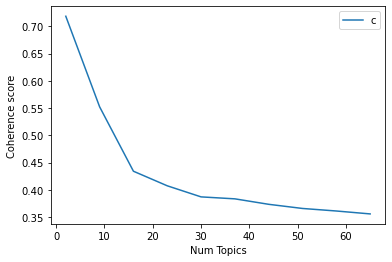

In [9]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = [] 
    model_list = [] 
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model) 
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence()) 
    return model_list, coherence_values 

def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 70;
    start = 2;
    step = 7; 
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, 
                                                            texts=processed_data, start=start, limit=limit, step=step) 
    x = range(start, limit, step) 
    plt.plot(x, coherence_values) 
    plt.xlabel("Num Topics") 
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best') 
    plt.show() 


processed_data = [sent.strip().split(",") for sent in tqdm(open('./data/리뷰내용_1_토큰.csv', 'r', encoding='utf-8').readlines())]
dictionary = corpora.Dictionary(processed_data)
dictionary.filter_extremes(no_above=0.05)
corpus = [dictionary.doc2bow(text) for text in processed_data]
print('Number of unique tokens: %d' % len(dictionary)) 
print('Number of documents: %d' % len(corpus))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 

find_optimal_number_of_topics(dictionary, corpus, processed_data)

C:\Users\SOOBIN\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████████████████████████████████████████████████████████████████████| 5354/5354 [00:00<00:00, 157313.21it/s]
2022-05-29 21:46:28,593 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2022-05-29 21:46:28,950 : INFO : built Dictionary<13428 unique tokens: ['', '0', '1', '10', '100']...> from 5354 documents (total 787038 corpus positions)
2022-05-29 21:46:28,957 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<13428 unique tokens: ['', '0', '1', '10', '100']...> from 5354 documents (total 787038 corpus positions)", 'datetime': '2022-05-29T21:46:28.957744', 'gensim': '4.2.0', 'python': '3.8.8 (default

Number of unique tokens: 602
Number of documents: 5354


2022-05-29 21:46:30,635 : INFO : merging changes from 2000 documents into a model of 5354 documents
2022-05-29 21:46:30,639 : INFO : topic #0 (0.500): 0.012*"코스" + 0.012*"서울" + 0.012*"정말" + 0.011*"정도" + 0.009*"가면" + 0.009*"사진" + 0.008*"나무" + 0.008*"한번" + 0.008*"역사" + 0.008*"때문"
2022-05-29 21:46:30,640 : INFO : topic #1 (0.500): 0.016*"공원" + 0.013*"역사" + 0.011*"정말" + 0.008*"장소" + 0.008*"구경" + 0.008*"풍경" + 0.008*"서울" + 0.008*"사진" + 0.008*"다른" + 0.008*"건물"
2022-05-29 21:46:30,640 : INFO : topic diff=0.754589, rho=1.000000
2022-05-29 21:46:30,642 : INFO : PROGRESS: pass 0, at document #4000/5354
2022-05-29 21:46:31,809 : INFO : merging changes from 2000 documents into a model of 5354 documents
2022-05-29 21:46:31,817 : INFO : topic #0 (0.500): 0.014*"코스" + 0.012*"정도" + 0.011*"정말" + 0.011*"바다" + 0.009*"가면" + 0.008*"한번" + 0.008*"겨울" + 0.008*"느낌" + 0.007*"아주" + 0.007*"타고"
2022-05-29 21:46:31,817 : INFO : topic #1 (0.500): 0.014*"사찰" + 0.014*"역사" + 0.013*"공원" + 0.011*"체험" + 0.009*"입장료" + 0.009

2022-05-29 21:46:35,664 : INFO : 55 batches submitted to accumulate stats from 3520 documents (133760 virtual)
2022-05-29 21:46:35,671 : INFO : 56 batches submitted to accumulate stats from 3584 documents (136192 virtual)
2022-05-29 21:46:35,702 : INFO : 57 batches submitted to accumulate stats from 3648 documents (138624 virtual)
2022-05-29 21:46:35,713 : INFO : 58 batches submitted to accumulate stats from 3712 documents (141056 virtual)
2022-05-29 21:46:35,726 : INFO : 59 batches submitted to accumulate stats from 3776 documents (143488 virtual)
2022-05-29 21:46:35,732 : INFO : 60 batches submitted to accumulate stats from 3840 documents (145920 virtual)
2022-05-29 21:46:35,745 : INFO : 61 batches submitted to accumulate stats from 3904 documents (148352 virtual)
2022-05-29 21:46:35,774 : INFO : 62 batches submitted to accumulate stats from 3968 documents (150784 virtual)
2022-05-29 21:46:35,784 : INFO : 63 batches submitted to accumulate stats from 4032 documents (153216 virtual)
2

2022-05-29 21:46:40,449 : INFO : 1 batches submitted to accumulate stats from 64 documents (2432 virtual)
2022-05-29 21:46:40,456 : INFO : 2 batches submitted to accumulate stats from 128 documents (4864 virtual)
2022-05-29 21:46:40,460 : INFO : 3 batches submitted to accumulate stats from 192 documents (7296 virtual)
2022-05-29 21:46:40,470 : INFO : 4 batches submitted to accumulate stats from 256 documents (9728 virtual)
2022-05-29 21:46:40,477 : INFO : 5 batches submitted to accumulate stats from 320 documents (12160 virtual)
2022-05-29 21:46:40,485 : INFO : 6 batches submitted to accumulate stats from 384 documents (14592 virtual)
2022-05-29 21:46:40,492 : INFO : 7 batches submitted to accumulate stats from 448 documents (17024 virtual)
2022-05-29 21:46:41,384 : INFO : 8 batches submitted to accumulate stats from 512 documents (19456 virtual)
2022-05-29 21:46:41,459 : INFO : 9 batches submitted to accumulate stats from 576 documents (21888 virtual)
2022-05-29 21:46:41,537 : INFO : 

2022-05-29 21:46:42,888 : INFO : 76 batches submitted to accumulate stats from 4864 documents (184832 virtual)
2022-05-29 21:46:42,896 : INFO : 77 batches submitted to accumulate stats from 4928 documents (187264 virtual)
2022-05-29 21:46:42,901 : INFO : 78 batches submitted to accumulate stats from 4992 documents (189696 virtual)
2022-05-29 21:46:42,907 : INFO : 79 batches submitted to accumulate stats from 5056 documents (192128 virtual)
2022-05-29 21:46:42,915 : INFO : 80 batches submitted to accumulate stats from 5120 documents (194560 virtual)
2022-05-29 21:46:42,923 : INFO : 81 batches submitted to accumulate stats from 5184 documents (196992 virtual)
2022-05-29 21:46:42,932 : INFO : 82 batches submitted to accumulate stats from 5248 documents (199424 virtual)
2022-05-29 21:46:42,940 : INFO : 83 batches submitted to accumulate stats from 5312 documents (201856 virtual)
2022-05-29 21:46:42,940 : INFO : 84 batches submitted to accumulate stats from 5376 documents (203452 virtual)
2

2022-05-29 21:46:48,424 : INFO : 23 batches submitted to accumulate stats from 1472 documents (55936 virtual)
2022-05-29 21:46:48,444 : INFO : 24 batches submitted to accumulate stats from 1536 documents (58368 virtual)
2022-05-29 21:46:48,502 : INFO : 25 batches submitted to accumulate stats from 1600 documents (60800 virtual)
2022-05-29 21:46:48,511 : INFO : 26 batches submitted to accumulate stats from 1664 documents (63232 virtual)
2022-05-29 21:46:48,524 : INFO : 27 batches submitted to accumulate stats from 1728 documents (65664 virtual)
2022-05-29 21:46:48,550 : INFO : 28 batches submitted to accumulate stats from 1792 documents (68096 virtual)
2022-05-29 21:46:48,587 : INFO : 29 batches submitted to accumulate stats from 1856 documents (70528 virtual)
2022-05-29 21:46:48,593 : INFO : 30 batches submitted to accumulate stats from 1920 documents (72960 virtual)
2022-05-29 21:46:48,602 : INFO : 31 batches submitted to accumulate stats from 1984 documents (75392 virtual)
2022-05-29

2022-05-29 21:46:51,130 : INFO : topic #8 (0.059): 0.025*"사진" + 0.023*"정말" + 0.018*"전시" + 0.017*"마음" + 0.017*"기도" + 0.011*"찍기" + 0.011*"하나" + 0.010*"동굴" + 0.010*"사찰" + 0.010*"대표"
2022-05-29 21:46:51,131 : INFO : topic #11 (0.059): 0.021*"정말" + 0.018*"입장료" + 0.015*"입구" + 0.014*"사진" + 0.013*"공원" + 0.013*"서울" + 0.012*"가면" + 0.012*"정도" + 0.012*"한번" + 0.010*"우리"
2022-05-29 21:46:51,132 : INFO : topic #1 (0.059): 0.025*"역사" + 0.024*"장소" + 0.021*"정말" + 0.020*"서울" + 0.020*"사찰" + 0.014*"공간" + 0.012*"공원" + 0.012*"건물" + 0.011*"경치" + 0.010*"가을"
2022-05-29 21:46:51,133 : INFO : topic diff=7.748423, rho=1.000000
2022-05-29 21:46:51,134 : INFO : PROGRESS: pass 0, at document #4000/5354
2022-05-29 21:46:51,877 : INFO : merging changes from 2000 documents into a model of 5354 documents
2022-05-29 21:46:51,884 : INFO : topic #7 (0.059): 0.023*"우리" + 0.020*"공룡" + 0.019*"가면" + 0.018*"공원" + 0.018*"전시" + 0.015*"주변" + 0.013*"물이" + 0.012*"역사" + 0.012*"선생" + 0.012*"근처"
2022-05-29 21:46:51,886 : INFO : topic #4

2022-05-29 21:46:55,286 : INFO : 44 batches submitted to accumulate stats from 2816 documents (107008 virtual)
2022-05-29 21:46:55,328 : INFO : 45 batches submitted to accumulate stats from 2880 documents (109440 virtual)
2022-05-29 21:46:55,329 : INFO : 46 batches submitted to accumulate stats from 2944 documents (111872 virtual)
2022-05-29 21:46:55,338 : INFO : 47 batches submitted to accumulate stats from 3008 documents (114304 virtual)
2022-05-29 21:46:55,348 : INFO : 48 batches submitted to accumulate stats from 3072 documents (116736 virtual)
2022-05-29 21:46:55,383 : INFO : 49 batches submitted to accumulate stats from 3136 documents (119168 virtual)
2022-05-29 21:46:55,393 : INFO : 50 batches submitted to accumulate stats from 3200 documents (121600 virtual)
2022-05-29 21:46:55,431 : INFO : 51 batches submitted to accumulate stats from 3264 documents (124032 virtual)
2022-05-29 21:46:55,444 : INFO : 52 batches submitted to accumulate stats from 3328 documents (126464 virtual)
2

2022-05-29 21:46:58,836 : INFO : topic #15 (0.045): 0.058*"장소" + 0.038*"단풍" + 0.033*"가을" + 0.031*"가장" + 0.028*"명소" + 0.022*"보기" + 0.020*"바위" + 0.017*"정말" + 0.017*"바다" + 0.015*"가시"
2022-05-29 21:46:58,838 : INFO : topic #18 (0.045): 0.031*"야경" + 0.023*"우리나라" + 0.022*"석탑" + 0.019*"전망" + 0.019*"신라" + 0.019*"가면" + 0.019*"다시" + 0.015*"케이블카" + 0.015*"건물" + 0.014*"한번"
2022-05-29 21:46:58,840 : INFO : topic #9 (0.045): 0.039*"폭포" + 0.025*"마을" + 0.024*"주변" + 0.022*"모습" + 0.020*"풍경" + 0.019*"길이" + 0.019*"가을" + 0.017*"절경" + 0.017*"입구" + 0.016*"단풍"
2022-05-29 21:46:58,841 : INFO : topic diff=0.680621, rho=0.577350
2022-05-29 21:46:58,841 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel<num_terms=602, num_topics=22, decay=0.5, chunksize=2000> in 1.93s', 'datetime': '2022-05-29T21:46:58.841640', 'gensim': '4.2.0', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}
2022-05-29 21:46:58,848 : INFO : usi

2022-05-29 21:47:02,226 : INFO : 66 batches submitted to accumulate stats from 4224 documents (160512 virtual)
2022-05-29 21:47:02,236 : INFO : 67 batches submitted to accumulate stats from 4288 documents (162944 virtual)
2022-05-29 21:47:02,241 : INFO : 68 batches submitted to accumulate stats from 4352 documents (165376 virtual)
2022-05-29 21:47:02,241 : INFO : 69 batches submitted to accumulate stats from 4416 documents (167808 virtual)
2022-05-29 21:47:02,259 : INFO : 70 batches submitted to accumulate stats from 4480 documents (170240 virtual)
2022-05-29 21:47:02,261 : INFO : 71 batches submitted to accumulate stats from 4544 documents (172672 virtual)
2022-05-29 21:47:02,279 : INFO : 72 batches submitted to accumulate stats from 4608 documents (175104 virtual)
2022-05-29 21:47:02,290 : INFO : 73 batches submitted to accumulate stats from 4672 documents (177536 virtual)
2022-05-29 21:47:02,296 : INFO : 74 batches submitted to accumulate stats from 4736 documents (179968 virtual)
2

2022-05-29 21:47:08,154 : INFO : 12 batches submitted to accumulate stats from 768 documents (29184 virtual)
2022-05-29 21:47:08,199 : INFO : 13 batches submitted to accumulate stats from 832 documents (31616 virtual)
2022-05-29 21:47:08,210 : INFO : 14 batches submitted to accumulate stats from 896 documents (34048 virtual)
2022-05-29 21:47:08,243 : INFO : 15 batches submitted to accumulate stats from 960 documents (36480 virtual)
2022-05-29 21:47:08,283 : INFO : 16 batches submitted to accumulate stats from 1024 documents (38912 virtual)
2022-05-29 21:47:08,335 : INFO : 17 batches submitted to accumulate stats from 1088 documents (41344 virtual)
2022-05-29 21:47:08,357 : INFO : 18 batches submitted to accumulate stats from 1152 documents (43776 virtual)
2022-05-29 21:47:08,369 : INFO : 19 batches submitted to accumulate stats from 1216 documents (46208 virtual)
2022-05-29 21:47:08,440 : INFO : 20 batches submitted to accumulate stats from 1280 documents (48640 virtual)
2022-05-29 21:

2022-05-29 21:47:11,175 : INFO : using symmetric alpha at 0.03125
2022-05-29 21:47:11,188 : INFO : using symmetric eta at 0.03125
2022-05-29 21:47:11,189 : INFO : using serial LDA version on this node
2022-05-29 21:47:11,193 : INFO : running online (single-pass) LDA training, 32 topics, 1 passes over the supplied corpus of 5354 documents, updating model once every 2000 documents, evaluating perplexity every 5354 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-29 21:47:11,194 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-05-29 21:47:11,195 : INFO : PROGRESS: pass 0, at document #2000/5354
2022-05-29 21:47:11,889 : INFO : merging changes from 2000 documents into a model of 5354 documents
2022-05-29 21:47:11,902 : INFO : topic #0 (0.031): 0.026*"계곡" + 0.019*"정말" + 0.018*"여행" + 0.015*"경복궁" + 0.015*"축제" + 0.015*"조금" + 0.014*"서울" + 0.012*"매우" + 0.011*"추억" + 0.011*"가기"
2022-05

2022-05-29 21:47:15,913 : INFO : 33 batches submitted to accumulate stats from 2112 documents (80256 virtual)
2022-05-29 21:47:15,920 : INFO : 34 batches submitted to accumulate stats from 2176 documents (82688 virtual)
2022-05-29 21:47:15,923 : INFO : 35 batches submitted to accumulate stats from 2240 documents (85120 virtual)
2022-05-29 21:47:15,995 : INFO : 36 batches submitted to accumulate stats from 2304 documents (87552 virtual)
2022-05-29 21:47:16,006 : INFO : 37 batches submitted to accumulate stats from 2368 documents (89984 virtual)
2022-05-29 21:47:16,020 : INFO : 38 batches submitted to accumulate stats from 2432 documents (92416 virtual)
2022-05-29 21:47:16,029 : INFO : 39 batches submitted to accumulate stats from 2496 documents (94848 virtual)
2022-05-29 21:47:16,066 : INFO : 40 batches submitted to accumulate stats from 2560 documents (97280 virtual)
2022-05-29 21:47:16,091 : INFO : 41 batches submitted to accumulate stats from 2624 documents (99712 virtual)
2022-05-29

2022-05-29 21:47:20,348 : INFO : topic #10 (0.027): 0.033*"주차장" + 0.028*"바람" + 0.025*"언덕" + 0.021*"전시관" + 0.021*"보고" + 0.020*"절경" + 0.018*"근처" + 0.017*"작품" + 0.016*"다리" + 0.015*"한번"
2022-05-29 21:47:20,349 : INFO : topic #36 (0.027): 0.034*"고택" + 0.029*"석탑" + 0.027*"나무" + 0.027*"보고" + 0.022*"공간" + 0.022*"매우" + 0.021*"벚꽃" + 0.016*"화장실" + 0.015*"아주" + 0.014*"내부"
2022-05-29 21:47:20,350 : INFO : topic #5 (0.027): 0.039*"역사" + 0.024*"마음" + 0.022*"천주교" + 0.019*"국보" + 0.017*"한번" + 0.017*"장소" + 0.016*"정말" + 0.015*"건물" + 0.015*"사찰" + 0.014*"정도"
2022-05-29 21:47:20,351 : INFO : topic diff=0.518347, rho=0.707107
2022-05-29 21:47:20,578 : INFO : -16.875 per-word bound, 120175.7 perplexity estimate based on a held-out corpus of 1354 documents with 753 words
2022-05-29 21:47:20,579 : INFO : PROGRESS: pass 0, at document #5354/5354
2022-05-29 21:47:20,707 : INFO : merging changes from 1354 documents into a model of 5354 documents
2022-05-29 21:47:20,722 : INFO : topic #31 (0.027): 0.052*"공룡" + 0.044

2022-05-29 21:47:24,249 : INFO : 54 batches submitted to accumulate stats from 3456 documents (131328 virtual)
2022-05-29 21:47:24,273 : INFO : 55 batches submitted to accumulate stats from 3520 documents (133760 virtual)
2022-05-29 21:47:24,284 : INFO : 56 batches submitted to accumulate stats from 3584 documents (136192 virtual)
2022-05-29 21:47:24,317 : INFO : 57 batches submitted to accumulate stats from 3648 documents (138624 virtual)
2022-05-29 21:47:24,344 : INFO : 58 batches submitted to accumulate stats from 3712 documents (141056 virtual)
2022-05-29 21:47:24,369 : INFO : 59 batches submitted to accumulate stats from 3776 documents (143488 virtual)
2022-05-29 21:47:24,381 : INFO : 60 batches submitted to accumulate stats from 3840 documents (145920 virtual)
2022-05-29 21:47:24,402 : INFO : 61 batches submitted to accumulate stats from 3904 documents (148352 virtual)
2022-05-29 21:47:24,416 : INFO : 62 batches submitted to accumulate stats from 3968 documents (150784 virtual)
2

2022-05-29 21:47:29,379 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
2022-05-29 21:47:30,623 : INFO : 1 batches submitted to accumulate stats from 64 documents (2432 virtual)
2022-05-29 21:47:30,628 : INFO : 2 batches submitted to accumulate stats from 128 documents (4864 virtual)
2022-05-29 21:47:30,639 : INFO : 3 batches submitted to accumulate stats from 192 documents (7296 virtual)
2022-05-29 21:47:30,644 : INFO : 4 batches submitted to accumulate stats from 256 documents (9728 virtual)
2022-05-29 21:47:30,655 : INFO : 5 batches submitted to accumulate stats from 320 documents (12160 virtual)
2022-05-29 21:47:30,663 : INFO : 6 batches submitted to accumulate stats from 384 documents (14592 virtual)
2022-05-29 21:47:30,672 : INFO : 7 batches submitted to accumulate stats from 448 documents (17024 virtual)
2022-05-29 21:47:31,403 : INFO : 8 batches submitted to accumulate stats from 512 documents (19456 vi

2022-05-29 21:47:33,059 : INFO : 75 batches submitted to accumulate stats from 4800 documents (182400 virtual)
2022-05-29 21:47:33,070 : INFO : 76 batches submitted to accumulate stats from 4864 documents (184832 virtual)
2022-05-29 21:47:33,074 : INFO : 77 batches submitted to accumulate stats from 4928 documents (187264 virtual)
2022-05-29 21:47:33,095 : INFO : 78 batches submitted to accumulate stats from 4992 documents (189696 virtual)
2022-05-29 21:47:33,097 : INFO : 79 batches submitted to accumulate stats from 5056 documents (192128 virtual)
2022-05-29 21:47:33,108 : INFO : 80 batches submitted to accumulate stats from 5120 documents (194560 virtual)
2022-05-29 21:47:33,116 : INFO : 81 batches submitted to accumulate stats from 5184 documents (196992 virtual)
2022-05-29 21:47:33,120 : INFO : 82 batches submitted to accumulate stats from 5248 documents (199424 virtual)
2022-05-29 21:47:33,129 : INFO : 83 batches submitted to accumulate stats from 5312 documents (201856 virtual)
2

2022-05-29 21:47:40,673 : INFO : 21 batches submitted to accumulate stats from 1344 documents (51072 virtual)
2022-05-29 21:47:40,676 : INFO : 22 batches submitted to accumulate stats from 1408 documents (53504 virtual)
2022-05-29 21:47:40,774 : INFO : 23 batches submitted to accumulate stats from 1472 documents (55936 virtual)
2022-05-29 21:47:40,774 : INFO : 24 batches submitted to accumulate stats from 1536 documents (58368 virtual)
2022-05-29 21:47:40,789 : INFO : 25 batches submitted to accumulate stats from 1600 documents (60800 virtual)
2022-05-29 21:47:40,805 : INFO : 26 batches submitted to accumulate stats from 1664 documents (63232 virtual)
2022-05-29 21:47:40,837 : INFO : 27 batches submitted to accumulate stats from 1728 documents (65664 virtual)
2022-05-29 21:47:40,891 : INFO : 28 batches submitted to accumulate stats from 1792 documents (68096 virtual)
2022-05-29 21:47:40,897 : INFO : 29 batches submitted to accumulate stats from 1856 documents (70528 virtual)
2022-05-29

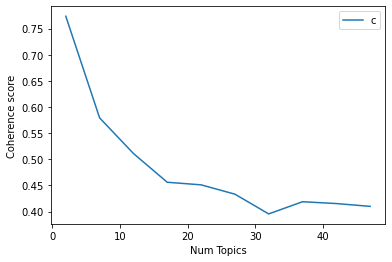

In [10]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = [] 
    model_list = [] 
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model) 
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence()) 
    return model_list, coherence_values 

def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 50;
    start = 2;
    step = 5; 
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, 
                                                            texts=processed_data, start=start, limit=limit, step=step) 
    x = range(start, limit, step) 
    plt.plot(x, coherence_values) 
    plt.xlabel("Num Topics") 
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best') 
    plt.show() 


processed_data = [sent.strip().split(",") for sent in tqdm(open('./data/리뷰내용_1_토큰.csv', 'r', encoding='utf-8').readlines())]
dictionary = corpora.Dictionary(processed_data)
dictionary.filter_extremes(no_below=15, no_above=0.05)
corpus = [dictionary.doc2bow(text) for text in processed_data]
print('Number of unique tokens: %d' % len(dictionary)) 
print('Number of documents: %d' % len(corpus))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 

find_optimal_number_of_topics(dictionary, corpus, processed_data)

In [11]:
import gensim
NUM_TOPICS = 7
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

C:\Users\SOOBIN\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2022-05-29 21:51:00,126 : INFO : using symmetric alpha at 0.14285714285714285
2022-05-29 21:51:00,129 : INFO : using symmetric eta at 0.14285714285714285
2022-05-29 21:51:00,131 : INFO : using serial LDA version on this node
2022-05-29 21:51:00,136 : INFO : running online (multi-pass) LDA training, 7 topics, 15 passes over the supplied corpus of 5354 documents, updating model once every 2000 documents, evaluating perplexity every 5354 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-29 21:51:00,137 : INFO : PROGRESS: pass 0, at document #2000/5354
2022-05-29 21:51:01,188 : INFO : merging changes from 2000 doc

2022-05-29 21:51:06,231 : INFO : topic #0 (0.143): 0.045*"코스" + 0.029*"한번" + 0.019*"장소" + 0.016*"조금" + 0.015*"길이" + 0.014*"계곡" + 0.013*"공원" + 0.011*"시설" + 0.011*"중간" + 0.011*"주변"
2022-05-29 21:51:06,233 : INFO : topic #1 (0.143): 0.017*"체험" + 0.016*"우리" + 0.014*"작품" + 0.014*"입장료" + 0.014*"거리" + 0.012*"동굴" + 0.012*"관람" + 0.012*"해변" + 0.012*"가기" + 0.011*"볼거리"
2022-05-29 21:51:06,235 : INFO : topic #5 (0.143): 0.035*"바다" + 0.033*"정말" + 0.029*"사진" + 0.026*"풍경" + 0.021*"구경" + 0.020*"전망대" + 0.016*"경치" + 0.016*"주차" + 0.015*"주차장" + 0.012*"입장료"
2022-05-29 21:51:06,238 : INFO : topic #4 (0.143): 0.025*"가면" + 0.025*"가을" + 0.022*"마음" + 0.019*"여름" + 0.018*"서울" + 0.018*"단풍" + 0.016*"정도" + 0.016*"계곡" + 0.015*"구경" + 0.013*"아주"
2022-05-29 21:51:06,239 : INFO : topic diff=0.457765, rho=0.419702
2022-05-29 21:51:06,240 : INFO : PROGRESS: pass 2, at document #4000/5354
2022-05-29 21:51:06,912 : INFO : merging changes from 2000 documents into a model of 5354 documents
2022-05-29 21:51:06,914 : INFO : topic

2022-05-29 21:51:11,501 : INFO : topic #2 (0.143): 0.052*"역사" + 0.021*"모습" + 0.020*"건물" + 0.020*"장소" + 0.015*"설명" + 0.012*"한국" + 0.011*"대한" + 0.011*"의미" + 0.011*"체험" + 0.011*"전시"
2022-05-29 21:51:11,504 : INFO : topic #4 (0.143): 0.035*"가을" + 0.031*"단풍" + 0.026*"가면" + 0.023*"마음" + 0.019*"여름" + 0.018*"정도" + 0.018*"계곡" + 0.016*"벚꽃" + 0.015*"구경" + 0.014*"기분"
2022-05-29 21:51:11,506 : INFO : topic #5 (0.143): 0.052*"바다" + 0.042*"사진" + 0.033*"풍경" + 0.030*"정말" + 0.022*"구경" + 0.020*"전망대" + 0.019*"경치" + 0.016*"주차장" + 0.014*"전망" + 0.014*"주차"
2022-05-29 21:51:11,508 : INFO : topic #0 (0.143): 0.052*"코스" + 0.029*"한번" + 0.019*"길이" + 0.016*"조금" + 0.015*"장소" + 0.014*"폭포" + 0.013*"등산" + 0.013*"계곡" + 0.013*"중간" + 0.011*"정도"
2022-05-29 21:51:11,509 : INFO : topic diff=0.275649, rho=0.360914
2022-05-29 21:51:11,853 : INFO : -8.023 per-word bound, 260.1 perplexity estimate based on a held-out corpus of 1354 documents with 753 words
2022-05-29 21:51:11,857 : INFO : PROGRESS: pass 4, at document #5354/5354

2022-05-29 21:51:15,708 : INFO : topic #5 (0.143): 0.066*"바다" + 0.052*"사진" + 0.036*"풍경" + 0.031*"정말" + 0.023*"경치" + 0.021*"구경" + 0.020*"전망대" + 0.016*"찍기" + 0.015*"주차" + 0.015*"주차장"
2022-05-29 21:51:15,711 : INFO : topic #1 (0.143): 0.033*"체험" + 0.020*"입장료" + 0.020*"축제" + 0.016*"우리" + 0.014*"볼거리" + 0.014*"작품" + 0.013*"거리" + 0.013*"관람" + 0.013*"동굴" + 0.012*"관리"
2022-05-29 21:51:15,712 : INFO : topic #4 (0.143): 0.037*"가을" + 0.032*"단풍" + 0.028*"가면" + 0.022*"마음" + 0.019*"여름" + 0.019*"계곡" + 0.017*"정도" + 0.017*"벚꽃" + 0.015*"기분" + 0.015*"구경"
2022-05-29 21:51:15,714 : INFO : topic #0 (0.143): 0.056*"코스" + 0.031*"한번" + 0.019*"길이" + 0.017*"폭포" + 0.016*"조금" + 0.015*"등산" + 0.013*"정도" + 0.013*"장소" + 0.013*"중간" + 0.012*"산책로"
2022-05-29 21:51:15,716 : INFO : topic #2 (0.143): 0.055*"역사" + 0.022*"장소" + 0.021*"모습" + 0.021*"건물" + 0.016*"설명" + 0.014*"한국" + 0.012*"전시" + 0.012*"대한" + 0.012*"의미" + 0.011*"문화"
2022-05-29 21:51:15,717 : INFO : topic diff=0.200481, rho=0.321462
2022-05-29 21:51:15,718 : INFO : 

2022-05-29 21:51:20,349 : INFO : topic #5 (0.143): 0.057*"사진" + 0.056*"바다" + 0.039*"풍경" + 0.032*"정말" + 0.023*"경치" + 0.023*"전망대" + 0.021*"구경" + 0.019*"주차" + 0.016*"찍기" + 0.016*"주차장"
2022-05-29 21:51:20,351 : INFO : topic #4 (0.143): 0.037*"가을" + 0.029*"단풍" + 0.029*"가면" + 0.025*"마음" + 0.022*"계곡" + 0.018*"여름" + 0.017*"기분" + 0.017*"서울" + 0.017*"정도" + 0.015*"벚꽃"
2022-05-29 21:51:20,353 : INFO : topic #3 (0.143): 0.038*"바람" + 0.034*"최고" + 0.026*"버스" + 0.023*"공원" + 0.022*"겨울" + 0.021*"자전거" + 0.020*"자연" + 0.016*"제주" + 0.016*"아주" + 0.015*"타고"
2022-05-29 21:51:20,354 : INFO : topic #2 (0.143): 0.057*"역사" + 0.022*"건물" + 0.022*"장소" + 0.018*"모습" + 0.016*"설명" + 0.014*"전시" + 0.014*"한국" + 0.012*"의미" + 0.012*"문화" + 0.011*"대한"
2022-05-29 21:51:20,355 : INFO : topic #0 (0.143): 0.051*"코스" + 0.030*"한번" + 0.018*"길이" + 0.016*"조금" + 0.016*"정도" + 0.014*"등산" + 0.014*"중간" + 0.013*"계곡" + 0.012*"폭포" + 0.012*"장소"
2022-05-29 21:51:20,355 : INFO : topic diff=0.193999, rho=0.280861
2022-05-29 21:51:20,356 : INFO : PR

2022-05-29 21:51:24,580 : INFO : topic #2 (0.143): 0.054*"역사" + 0.022*"건물" + 0.022*"장소" + 0.020*"모습" + 0.016*"설명" + 0.015*"전시" + 0.013*"한국" + 0.013*"문화" + 0.012*"대한" + 0.012*"의미"
2022-05-29 21:51:24,581 : INFO : topic #0 (0.143): 0.053*"코스" + 0.029*"한번" + 0.018*"길이" + 0.016*"조금" + 0.016*"정도" + 0.016*"폭포" + 0.015*"등산" + 0.014*"중간" + 0.013*"산책로" + 0.013*"이용"
2022-05-29 21:51:24,582 : INFO : topic #4 (0.143): 0.038*"가을" + 0.033*"단풍" + 0.028*"가면" + 0.024*"마음" + 0.020*"계곡" + 0.017*"여름" + 0.017*"벚꽃" + 0.017*"구경" + 0.017*"정도" + 0.016*"기분"
2022-05-29 21:51:24,584 : INFO : topic #6 (0.143): 0.050*"사찰" + 0.047*"공원" + 0.043*"느낌" + 0.035*"여행" + 0.024*"그냥" + 0.022*"분위기" + 0.019*"석탑" + 0.018*"해수욕장" + 0.016*"매우" + 0.014*"보물"
2022-05-29 21:51:24,584 : INFO : topic #5 (0.143): 0.059*"바다" + 0.056*"사진" + 0.038*"풍경" + 0.029*"정말" + 0.024*"경치" + 0.021*"전망대" + 0.018*"바위" + 0.018*"구경" + 0.018*"주차" + 0.016*"전망"
2022-05-29 21:51:24,586 : INFO : topic diff=0.134224, rho=0.261025
2022-05-29 21:51:24,833 : INFO : 

2022-05-29 21:51:28,758 : INFO : PROGRESS: pass 13, at document #5354/5354
2022-05-29 21:51:28,964 : INFO : merging changes from 1354 documents into a model of 5354 documents
2022-05-29 21:51:28,975 : INFO : topic #6 (0.143): 0.050*"사찰" + 0.049*"공원" + 0.043*"느낌" + 0.040*"여행" + 0.024*"그냥" + 0.022*"분위기" + 0.021*"해수욕장" + 0.018*"석탑" + 0.017*"매우" + 0.014*"보물"
2022-05-29 21:51:28,977 : INFO : topic #4 (0.143): 0.038*"가을" + 0.032*"단풍" + 0.029*"가면" + 0.022*"마음" + 0.020*"계곡" + 0.019*"구경" + 0.017*"여름" + 0.017*"벚꽃" + 0.016*"기분" + 0.015*"정도"
2022-05-29 21:51:28,980 : INFO : topic #5 (0.143): 0.066*"바다" + 0.060*"사진" + 0.038*"풍경" + 0.030*"정말" + 0.025*"경치" + 0.021*"전망대" + 0.020*"해변" + 0.019*"바위" + 0.019*"주차" + 0.016*"전망"
2022-05-29 21:51:28,982 : INFO : topic #2 (0.143): 0.055*"역사" + 0.023*"장소" + 0.022*"건물" + 0.020*"모습" + 0.016*"설명" + 0.016*"전시" + 0.014*"한국" + 0.014*"문화" + 0.012*"대한" + 0.012*"의미"
2022-05-29 21:51:28,985 : INFO : topic #1 (0.143): 0.036*"체험" + 0.023*"입장료" + 0.021*"축제" + 0.017*"무료" + 0

(0, '0.055*"코스" + 0.030*"한번" + 0.017*"길이" + 0.017*"정도"')
(1, '0.036*"체험" + 0.024*"입장료" + 0.021*"축제" + 0.018*"무료"')
(2, '0.055*"역사" + 0.022*"장소" + 0.022*"건물" + 0.020*"모습"')
(3, '0.040*"바람" + 0.036*"최고" + 0.028*"겨울" + 0.026*"버스"')
(4, '0.038*"가을" + 0.032*"단풍" + 0.030*"가면" + 0.023*"마음"')
(5, '0.066*"바다" + 0.060*"사진" + 0.038*"풍경" + 0.030*"정말"')
(6, '0.050*"사찰" + 0.049*"공원" + 0.044*"느낌" + 0.040*"여행"')


In [12]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\SOOBIN\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

C:\Users\SOOBIN\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

C:\Users\SOOBIN\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.1429,"[(0, 0.14285715), (1, 0.14285715), (2, 0.14285..."
1,1,2.0,0.8925,"[(0, 0.017890159), (1, 0.01793755), (2, 0.8924..."
2,2,4.0,0.5202,"[(0, 0.015940784), (1, 0.19251153), (2, 0.2236..."
3,3,4.0,0.8774,"[(0, 0.02041206), (1, 0.020412205), (2, 0.0205..."
4,4,4.0,0.7606,"[(0, 0.020552488), (1, 0.13699663), (2, 0.0204..."
5,5,0.0,0.7749,"[(0, 0.7749461), (1, 0.15335186), (2, 0.014360..."
6,6,2.0,0.7340,"[(0, 0.012990306), (1, 0.012996642), (2, 0.733..."
7,7,6.0,0.9043,"[(0, 0.015930485), (1, 0.01606821), (2, 0.0159..."
8,8,0.0,0.4636,"[(0, 0.46355155), (1, 0.16985917), (2, 0.09131..."
9,9,2.0,0.5733,"[(0, 0.011921673), (1, 0.011912963), (2, 0.573..."


In [20]:
df_=pd.DataFrame(topics, columns=['번호','단어'])
df_['단어']=df_['단어'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')
df_['단어']=df_['단어'].apply(lambda x: x.split())

df_

C:\Users\SOOBIN\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-20-ce7e368dfe02>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_['단어']=df_['단어'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')


,번호,단어
0,0,"[코스, 한번, 길이, 정도]"
1,1,"[체험, 입장료, 축제, 무료]"
2,2,"[역사, 장소, 건물, 모습]"
3,3,"[바람, 최고, 겨울, 버스]"
4,4,"[가을, 단풍, 가면, 마음]"
5,5,"[바다, 사진, 풍경, 정말]"
6,6,"[사찰, 공원, 느낌, 여행]"
